# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.044859e+01     5.643251e+00
 * time: 0.001544952392578125
     1     2.897519e+01     4.799014e+00
 * time: 0.008275032043457031
     2     2.060138e+01     4.557457e+00
 * time: 0.013627052307128906
     3     1.495199e+01     3.799875e+00
 * time: 0.01868605613708496
     4     1.115510e+01     1.667996e+00
 * time: 0.0720970630645752
     5     9.604062e+00     8.972450e-01
 * time: 0.07779717445373535
     6     9.065795e+00     9.116029e-01
 * time: 0.08183908462524414
     7     8.802287e+00     6.240248e-01
 * time: 0.0856621265411377
     8     8.582219e+00     5.872809e-01
 * time: 0.09016799926757812
     9     8.454780e+00     5.516815e-01
 * time: 0.09406113624572754
    10     8.427194e+00     9.768125e-01
 * time: 0.09720015525817871
    11     8.365886e+00     7.632600e-01
 * time: 0.10151004791259766
    12     8.326970e+00     1.029969e+00
 * time: 0.10463500022888184
    13     8.282204e+00     6.799376e-01
 * time

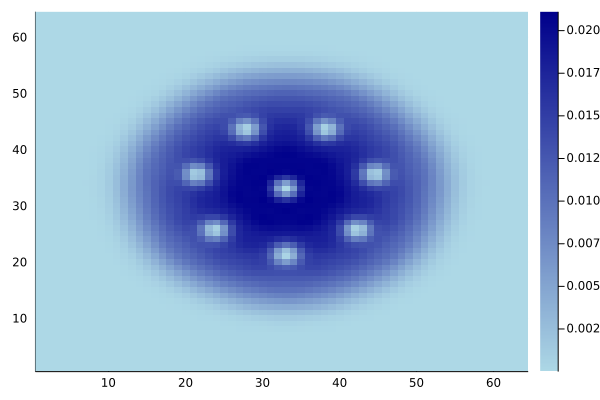

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)